In [23]:
# TASK 0

import pandas as pd

data = pd.read_csv("iris_clusters.csv", delimiter=";", index_col="id")

data.head()

,pl,pw,sl,sw
id,,,,
87.0,6.7,3.0,4.6,1.5
209.0,6.7,2.8,4.6,1.2
344.0,5.0,3.6,1.6,0.5
401.0,6.3,3.1,5.9,2.5
430.0,7.0,2.9,5.7,1.7


0    193
2    106
1      1
Name: count, dtype: int64


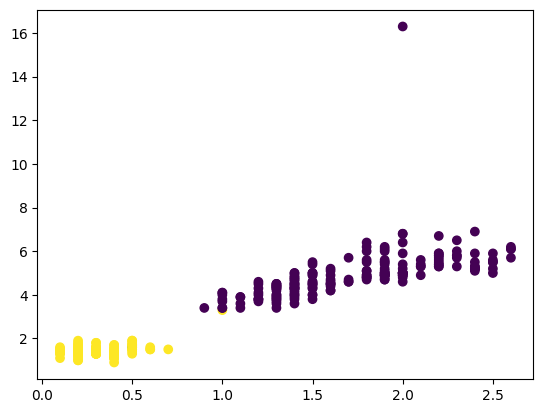

In [24]:
# Taks 1

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=3, random_state=0).fit(data[["pl", "pw", "sl", "sw"]])


print(pd.Series(kmeans.labels_).value_counts())


plt.scatter(data["sw"], data["sl"], c=kmeans.labels_, cmap='viridis') 
plt.show()


 1    285
-1     15
Name: count, dtype: int64
pl    0.042529
pw    0.038608
sl    0.014448
sw    0.004042
dtype: float64
pl    0.078983
pw    0.086868
sl    0.099691
sw    0.105082
dtype: float64
pl    0.058703
pw    0.058657
sl    0.053645
sw    0.050499
dtype: float64
pl    0.007938
pw    0.008269
sl    0.025164
sw    0.031016
dtype: float64
1    98
0    95
2    92
Name: count, dtype: int64


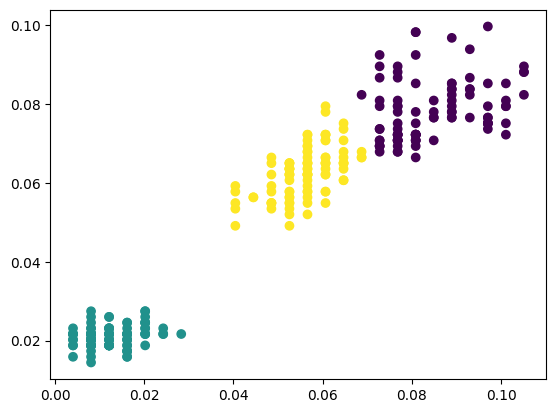

[pl, pw, sl, sw]
[[0.06526488 0.05661134 0.07845992 0.08470412]
 [0.0503098  0.06606675 0.02109694 0.01224862]
 [0.0608662  0.05287601 0.0626915  0.0559239 ]]


In [25]:
# Task 2

import sklearn.preprocessing as preprocessing




from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=10)
outliers = lof.fit_predict(data)
print(pd.Series(outliers).value_counts())
data_filtered = data[outliers == 1]

data_filtered = preprocessing.normalize(data_filtered, axis=0)
data_filtered = pd.DataFrame(data_filtered, columns=["pl", "pw", "sl", "sw"])

print(data_filtered.min())
print(data_filtered.max())
print(data_filtered.mean())
print(data_filtered.std())

kmeans = KMeans(n_clusters=3, random_state=0).fit(data_filtered)
print(pd.Series(kmeans.labels_).value_counts())
plt.scatter(data_filtered["sw"], data_filtered["sl"], c=kmeans.labels_, cmap='viridis') 
plt.show()


import numpy as np
centroids = np.array(kmeans.cluster_centers_)
print("[pl, pw, sl, sw]")
print(centroids)


In [26]:
import sklearn.metrics

# Task 3

best_score = 999
best_k = -1
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(data_filtered[["pl", "pw", "sl", "sw"]])

    current_score = sklearn.metrics.davies_bouldin_score(data_filtered[["pl", "pw", "sl", "sw"]], kmeans.labels_)

    if current_score < best_score:
        best_score = current_score
        best_k = k

print(f"Best k: {best_k} with score {best_score}")
    

Best k: 2 with score 0.3639293444681843


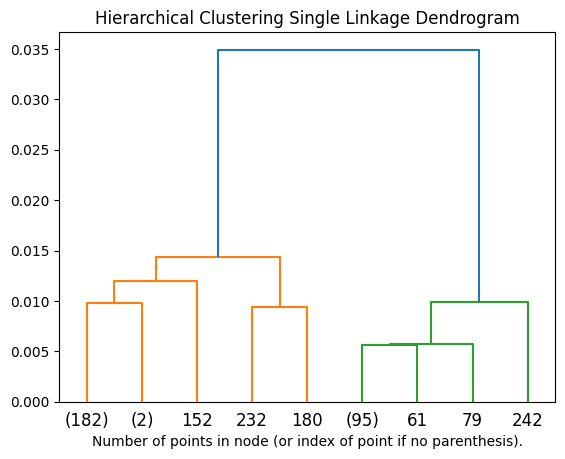

Cluster 1 points:  175
Cluster 2 points:  95


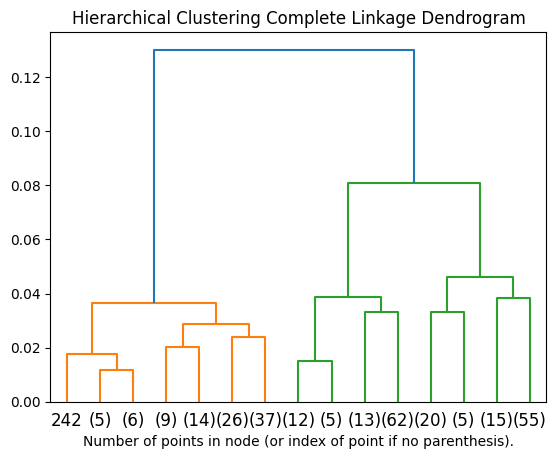

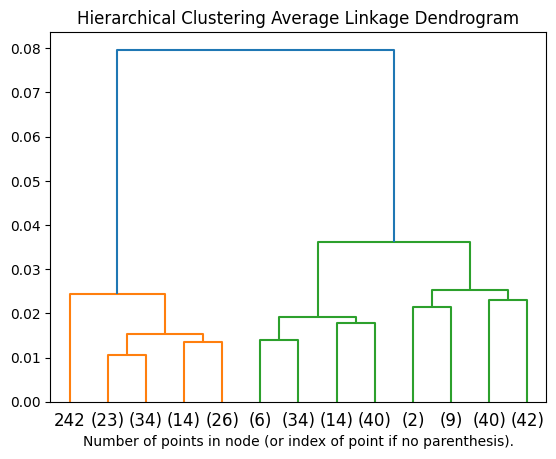

In [27]:
# Task 4

from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(linkage="single", n_clusters=None,distance_threshold=0).fit(data_filtered[["pl", "pw", "sl", "sw"]])

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

plt.title("Hierarchical Clustering Single Linkage Dendrogram")
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

print("Cluster 1 points: ", 170 + 1 + 1 + 1 + 1 + 1)
print("Cluster 2 points: ", 85 + 2 + 6 + 1 + 1)

model = AgglomerativeClustering(linkage="complete", n_clusters=None,distance_threshold=0).fit(data_filtered[["pl", "pw", "sl", "sw"]])

plt.title("Hierarchical Clustering Complete Linkage Dendrogram")
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

model = AgglomerativeClustering(linkage="average", n_clusters=None,distance_threshold=0).fit(data_filtered[["pl", "pw", "sl", "sw"]])

plt.title("Hierarchical Clustering Average Linkage Dendrogram")
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

0    285
Name: count, dtype: int64


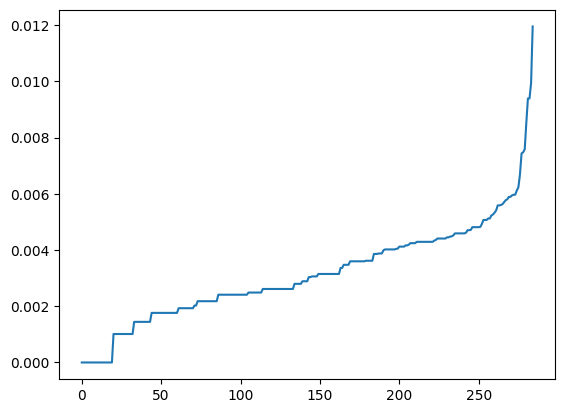

 0    180
 1     98
-1      7
Name: count, dtype: int64


In [34]:
# Task 5
# db scan

from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1, min_samples=5).fit(data_filtered[["pl", "pw", "sl", "sw"]])
print(pd.Series(dbscan.labels_).value_counts())

# Plot k-distances
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from sklearn.neighbors import NearestNeighbors

def k_distances2(X,n):
    neighbors = NearestNeighbors(n_neighbors=n)
    neighbors_fit = neighbors.fit(X)
    distances, indices = neighbors_fit.kneighbors(X)
    return distances, indices


distances, indices = k_distances2(data_filtered,5)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.show()


dbscan = DBSCAN(eps=0.01, min_samples=5).fit(data_filtered[["pl", "pw", "sl", "sw"]])
print(pd.Series(dbscan.labels_).value_counts())
